Proceed with the dataset and find the best classifier predicting survivability.
*   Use all the classifiers covered so far. Provide automatic mechanism to compare performance of various models.
*   If you would like to look for some other classifiers in sklearn, then it is OK.
*   Use pipelines if necessary, especially if you decide to use normalization/standardization or PCA.
*   For each model, try to find the best hyperparameters.
*   For various results of cross-validation present ROCs and PRCs.
*   If you lack data (`NaN` etc.), do not skip the samples. Instead, impute them: the best option is to find similar samples (on the basis of other features) and then calculate the missing data by taking mean value. You can apply some basic form of clustering. KNNs are also the option.

**This homework is obligatory. Just do as much time lets you. Even a small analysis will be welcome. Please send colab link to krusek@agh.edu.pl before 17.04.2024. Give permission to edit!**

## https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/problem12.html
0. Survived Indicator
1. Passenger Class
2. Name
3. Sex
4. Age
5. Siblings Aboard
6. Parents Aboard
7. Fare paid in £s


- survival - Survival (0 = No; 1 = Yes)
- class - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
- name - Name
- sex - Sex
- age - Age
- sibsp - Number of Siblings/Spouses Aboard
- parch - Number of Parents/Children Aboard
- ticket - Ticket Number
- fare - Passenger Fare
- cabin - Cabin
- embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)
- boat - Lifeboat (if survived)
- body - Body number (if did not survive and body was recovered)

In [20]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
import platform
import pandas as pd
import numpy as np
import warnings
import sys;
#define Seaborn color palette to use
import numpy as np
from math import ceil
from itertools import zip_longest
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_openml
import missingno as msno

In [21]:

v = platform.python_version_tuple();
if float(v[1]) < 10:
    raise Exception("MUST USE Python 3.10 to use MATCH expression!")

warnings.filterwarnings("ignore", "is_categorical_dtype")
warnings.filterwarnings("ignore", "use_inf_as_na")
np.set_printoptions(threshold=sys.maxsize)
pd.options.display.max_colwidth = 1000

from enum import Enum, unique

@unique
class PDataType(Enum):
    NUMERICAL = 1
    CATHEGORICAL = 2

def remove_distinct_value_features(df):
    return [e for e in df.columns if df[e].nunique() == 1]

def get_data_type(df, type):
    match type:
        case PDataType.NUMERICAL:
            return df.select_dtypes(np.number);
        case PDataType.CATHEGORICAL:
            return df.select_dtypes(include='object');

#select all cathegorigal data where the first value is more than percent%?
def get_cathegorical_data_by_percent(df, percent):
    col_names = get_data_type(df,PDataType.CATHEGORICAL)
    to_return = []
    for col_name in col_names:
        unique_v_df = (df[col_name].value_counts()).to_frame()
        unique_v_df['percent'] = (unique_v_df/unique_v_df.sum()*100)
        if unique_v_df.iloc[0].percent > percent:
            to_return.append(col_name);
    return to_return
    
def fill_empty_data_with(df, type, filler):
    col_names = get_data_type(df,type)
    for c in col_names:
        test_data_csv[c] = test_data_csv[c].fillna(filler)


In [22]:
DO_NOT_PLOT = False

In [23]:


def plot_pie_for_unique_category(df,col_name_x, ax):
    if not DO_NOT_PLOT:
        colors = sns.color_palette('pastel')
        unique_v_df = (df[col_name_x].value_counts()).to_frame()
        unique_v_df['percent'] = (unique_v_df/unique_v_df.sum()*100)
        unique_v_df.plot.pie(y='count', use_index=True,autopct='%0.2f%%', title = f"{col_name_x}", ax = ax)


def plot_hist_for_unique_category(df,col_name_x,col_name_y):
    if not DO_NOT_PLOT:
        unique_v_df = (df[col_name_x].value_counts()).to_frame()
        unique_v_df['percent'] = (unique_v_df/unique_v_df.sum()*100)
        fig, axs = plt.subplots(nrows=len(unique_v_df), figsize=(16,10))
        i = 0;
        for index, row in unique_v_df.iterrows():
            value_percent = row.iloc[1];
            value = row.iloc[0];
            name = index;
            sns.histplot(data=df.loc[df[col_name_x] == name], x=col_name_y, ax = axs[i],bins=100, label =f'{col_name_x} {name} : {value} | {value_percent:.2f}%')
            axs[i].set_xlim(df[col_name_y].min(), df[col_name_y].max())
            axs[i].legend()
            i+=1
        fig.suptitle(f"{col_name_x} on {col_name_y}")
        plt.show()
        
def plot_hist_for_stat(df,col_name_x, stat = 'count'):
    if not DO_NOT_PLOT:
        sns.histplot(data=df, x=col_name_x, stat = stat)
        plt.legend()
        plt.show()
                     
    
def plot_unique_category(df,col_name_x,col_name_y):
    if not DO_NOT_PLOT:
        plot_hist_for_unique_category(df,col_name_x,col_name_y)
        fig, axs = plt.subplots(1, 2, figsize=(10,10))
        fig.tight_layout()
        plot_pie_for_unique_category(df,col_name_x,axs[0])
        sns.boxenplot(data=df, x=col_name_x, y=col_name_y, ax = axs[1])
        plt.show()
    
def plot_hist_for_unique_category_array(df,col_names_x,col_name_y):
    if not DO_NOT_PLOT:
        for col_name_x in col_names_x:
            plot_hist_for_unique_category(df,col_name_x,col_name_y)
            plt.show()

#RAVEL returns flatted array, depricated. use to_numpy
def plot_pie_for_unique_category_array(df,col_names_x):
    if not DO_NOT_PLOT:
        n_rows, n_cols = ceil(len(col_names_x) / 3), 3
        fig, axs = plt.subplots(ncols=n_cols, nrows=n_rows, figsize=(20, 80))
        for col_name_x,ax in zip_longest(col_names_x,axs.ravel()):
            if col_name_x is not None:
                colors = sns.color_palette('pastel')
                unique_v_df = (df[col_name_x].value_counts()).to_frame()
                unique_v_df['percent'] = (unique_v_df/unique_v_df.sum()*100)
                unique_v_df.plot.pie(y='count', use_index=True,autopct='%0.2f%%', title = f"{col_name_x}",ax=ax )
            else:
                fig.delaxes(ax)
        plt.draw()
        plt.tight_layout()
    

def plot_correlation_for(df, col_name, n):
    corr = df.corr(numeric_only=True)[col_name].sort_values(ascending=False)
    top_corr = corr[1:n]
    selected_features = list(top_corr.index) + [col_name]
    correlation_matrix = df[selected_features].corr()
    mask = np.triu(correlation_matrix)
    if not DO_NOT_PLOT:
        plt.figure(figsize=(12, 8))
        sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=.5, fmt=".2f", vmin=-1, vmax=1,mask=mask)
        plt.title(f"Top of correlation with [{col_name}]", fontsize=16)
        plt.show()
    return top_corr

def plot_overall_correlation_for(df,target_cols,n_count):
    df_no_target = df.copy().drop(columns = target_cols)
    top_correlation = df_no_target.corr().unstack().sort_values(ascending = False).drop_duplicates()[1:n_count]
    top_correlation.plot.bar(grid = True)
    return  top_correlation
def scikit_model_vis(y_valid, y_pred):
    if not DO_NOT_PLOT:
        plt.figure()
        plt.scatter(y_valid, y_pred)
        plt.xlabel('ground truth (y_valid)')
        plt.ylabel('predict (y_pred)')
        plt.show()

    print(f'MAE: {metrics.mean_absolute_error(y_valid, y_pred):.2f}')
    print(f'MSE: {metrics.mean_squared_error(y_valid, y_pred):.2f}')
    print(f'R2: {metrics.r2_score(y_valid, y_pred):.2f}')

In [56]:
#@markdown You know this data, but so far you had the opportunity to work with classification on it
#https://www.openml.org/search?type=data&sort=runs&id=40945&status=active
#titanic = pd.read_csv('https://raw.githubusercontent.com/GokuMohandas/MadeWithML/main/datasets/titanic.csv')
df = fetch_openml("titanic", version=1, as_frame=True)
print(df)
df = df['frame']


{'data':       pclass                                             name     sex  \
0          1                    Allen, Miss. Elisabeth Walton  female   
1          1                   Allison, Master. Hudson Trevor    male   
2          1                     Allison, Miss. Helen Loraine  female   
3          1             Allison, Mr. Hudson Joshua Creighton    male   
4          1  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)  female   
...      ...                                              ...     ...   
1304       3                             Zabour, Miss. Hileni  female   
1305       3                            Zabour, Miss. Thamine  female   
1306       3                        Zakarian, Mr. Mapriededer    male   
1307       3                              Zakarian, Mr. Ortin    male   
1308       3                               Zimmerman, Mr. Leo    male   

          age  sibsp  parch  ticket      fare    cabin embarked boat   body  \
0     29.0000      0      0   24160

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   pclass     1309 non-null   int64   
 1   survived   1309 non-null   category
 2   name       1309 non-null   object  
 3   sex        1309 non-null   category
 4   age        1046 non-null   float64 
 5   sibsp      1309 non-null   int64   
 6   parch      1309 non-null   int64   
 7   ticket     1309 non-null   object  
 8   fare       1308 non-null   float64 
 9   cabin      295 non-null    object  
 10  embarked   1307 non-null   category
 11  boat       486 non-null    object  
 12  body       121 non-null    float64 
 13  home.dest  745 non-null    object  
dtypes: category(3), float64(3), int64(3), object(5)
memory usage: 116.8+ KB


## Convert some data, cleanup

In [29]:
print("NULL: ")

print(df.isnull().sum())
print("DUPLICATED: ")
print(df.duplicated().sum())


NULL: 
pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64
DUPLICATED: 
0


In [75]:
df['survived'] = df['survived'].astype('int8')


In [109]:
#Body means that the body was found, so if it not null this means the survived is 0. Remove it
# if did not survive and body was recovered
bodys = df[(~df['body'].isna()) & (df['survived'] == 1)]
bodys
#drop it as there is no needed information

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest


In [108]:
#Age. What to do with Nan?

In [107]:
df[df['age'].isnull()]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
15,1,0,"Baumann, Mr. John D",male,NaN,0,0,PC 17318,25.9250,NaN,S,NaN,NaN,"New York, NY"
37,1,1,"Bradley, Mr. George ('George Arthur Brayton')",male,NaN,0,0,111427,26.5500,NaN,S,9,NaN,"Los Angeles, CA"
40,1,0,"Brewe, Dr. Arthur Jackson",male,NaN,0,0,112379,39.6000,NaN,C,NaN,NaN,"Philadelphia, PA"
46,1,0,"Cairns, Mr. Alexander",male,NaN,0,0,113798,31.0000,NaN,S,NaN,NaN,NaN
59,1,1,"Cassebeer, Mrs. Henry Arthur Jr (Eleanor Genevieve Fosdick)",female,NaN,0,0,17770,27.7208,NaN,C,5,NaN,"New York, NY"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1293,3,0,"Williams, Mr. Howard Hugh 'Harry'",male,NaN,0,0,A/5 2466,8.0500,NaN,S,NaN,NaN,NaN
1297,3,0,"Wiseman, Mr. Phillippe",male,NaN,0,0,A/4. 34244,7.2500,NaN,S,NaN,NaN,NaN
1302,3,0,"Yousif, Mr. Wazli",male,NaN,0,0,2647,7.2250,NaN,C,NaN,NaN,NaN
1303,3,0,"Yousseff, Mr. Gerious",male,NaN,0,0,2627,14.4583,NaN,C,NaN,NaN,NaN


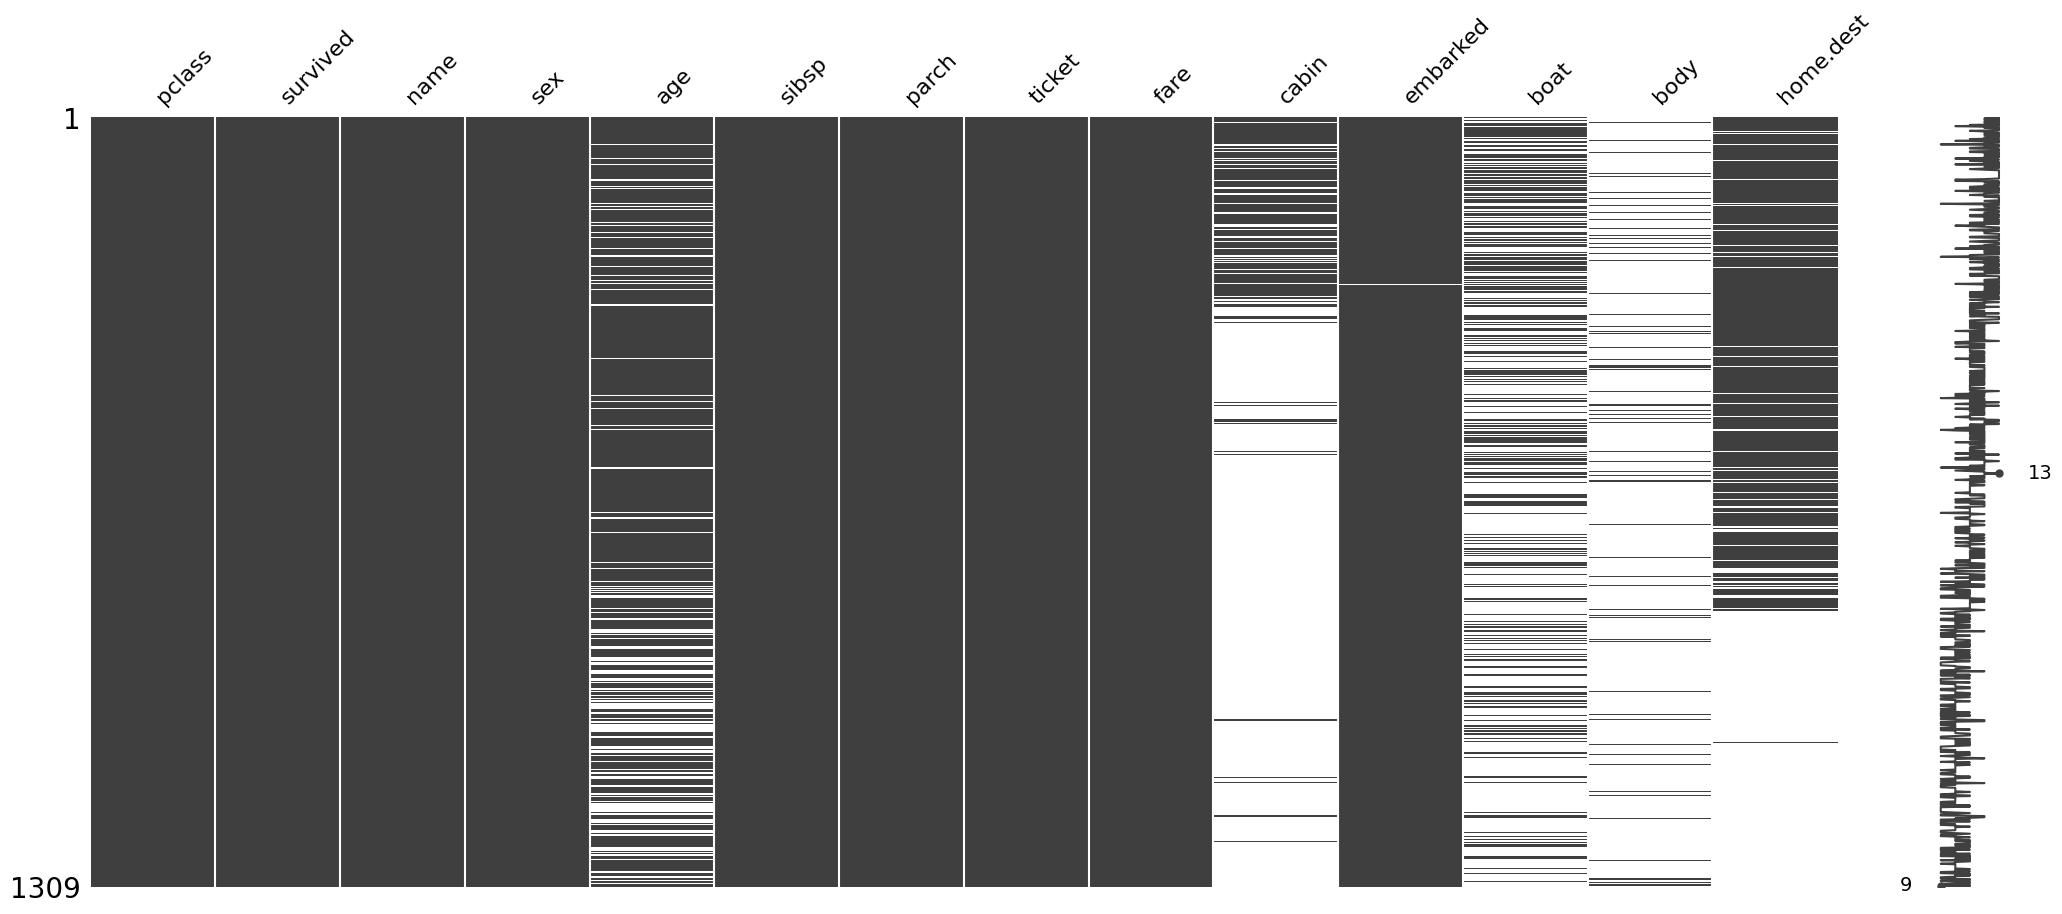

In [39]:
msno.matrix(df)
plt.show()

#so maybe add some info not about age itself but about the general binning? infant < 2, child < 10, and so one?

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


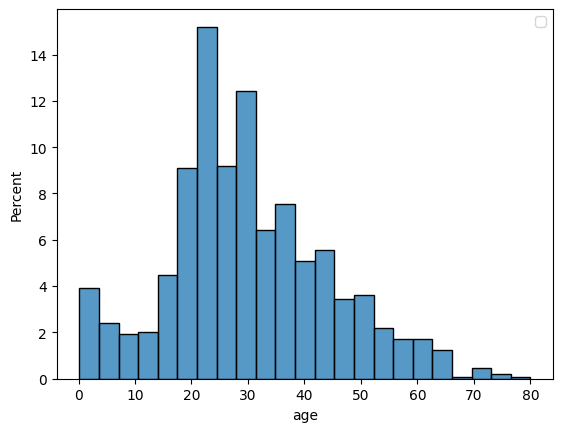

In [40]:
plot_hist_for_stat(df,'age', 'percent')


In [41]:

df['sibsp'] = df['sibsp'].astype('int8')
df['sex'] = df['sex'].map({'male': 0,'female': 1})


## PClass to OneHotEncoder! Its much clearer what is happening

In [44]:
enc = OneHotEncoder(handle_unknown='ignore')
enc_df = pd.DataFrame(enc.fit_transform(df[['pclass']]).toarray()).add_prefix('class_')
df = df.join(enc_df)
df = df.drop(columns = ['pclass'])


KeyError: "None of [Index(['pclass'], dtype='object')] are in the [columns]"

There are items with 0 fee, which is weird
how Fare can be 0? Only man. Multiple ages, and multiple Pclass
maybe they are workers? Or they are sponsors? No.. sponsors would get more family, I think


In [46]:
print(df['fare'].describe())
zero_fee = df[df['fare'] == 0]

def search_string(s, search):
    return search in str(s).lower()

for Name in zero_fee['name']:
    _name_list = list(Name.split(" "))
    length = len(_name_list)
    sure_name = _name_list[length-1].lower()
    mask = df.apply(lambda x: x.map(lambda s: search_string(s, sure_name)))
    filtered_df = df.loc[mask.any(axis=1)]
    print(sure_name)
    print(filtered_df['name'])
    print("^"*10)
    

count    1308.000000
mean       33.295479
std        51.758668
min         0.000000
25%         7.895800
50%        14.454200
75%        31.275000
max       512.329200
Name: fare, dtype: float64
jr
7                                            Andrews, Mr. Thomas Jr
59      Cassebeer, Mrs. Henry Arthur Jr (Eleanor Genevieve Fosdick)
77                                 Compton, Mr. Alexander Taylor Jr
177                                    Kimball, Mr. Edwin Nelson Jr
178                Kimball, Mrs. Edwin Nelson Jr (Gertrude Parsons)
233                   Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)
295                                     Thayer, Mr. John Borland Jr
298                                 Tucker, Mr. Gilbert Milligan Jr
385                                  Davies, Master. John Morgan Jr
453                                            Hood, Mr. Ambrose Jr
791                                            Elias, Mr. Joseph Jr
898                                 Johnson, Mr. Willi

## 0 fee

In [47]:
_indexes  = zero_fee.index.to_numpy();
_len_0 = len(_indexes)
print(f'Percent of people with 0 Fee is = {(_len_0 * 100) / df.shape[0]} %')
df = df.drop(index=_indexes)

Percent of people with 0 Fee is = 1.2987012987012987 %


In [48]:
print(df.sort_values('fare', ascending = False).head(80)[['fare','class_0','class_1','class_2']])
print(df.sort_values('fare').head(80)[['fare','class_0','class_1','class_2']])


         fare  class_0  class_1  class_2
50   512.3292      1.0      0.0      0.0
302  512.3292      1.0      0.0      0.0
49   512.3292      1.0      0.0      0.0
183  512.3292      1.0      0.0      0.0
111  263.0000      1.0      0.0      0.0
..        ...      ...      ...      ...
295  110.8833      1.0      0.0      0.0
108  110.8833      1.0      0.0      0.0
296  110.8833      1.0      0.0      0.0
229  108.9000      1.0      0.0      0.0
218  108.9000      1.0      0.0      0.0

[80 rows x 4 columns]
        fare  class_0  class_1  class_2
1082  3.1708      0.0      0.0      1.0
673   4.0125      0.0      0.0      1.0
51    5.0000      1.0      0.0      0.0
1068  6.2375      0.0      0.0      1.0
960   6.4375      0.0      0.0      1.0
...      ...      ...      ...      ...
1253  7.2292      0.0      0.0      1.0
1066  7.2292      0.0      0.0      1.0
847   7.2292      0.0      0.0      1.0
875   7.2292      0.0      0.0      1.0
607   7.2292      0.0      0.0      1.0

[80 

In [50]:
df['fare'].value_counts()

fare
8.0500     60
13.0000    59
7.7500     55
26.0000    50
7.8958     49
           ..
15.0500     1
14.0000     1
15.5792     1
12.0000     1
7.8750      1
Name: count, Length: 280, dtype: int64

In [51]:
#Drop name, for now
no_name_DF = df.drop(columns = ['name'])
plot_overall_correlation_for(no_name_DF,'survived',5)
plot_correlation_for(no_name_DF, 'survived',10)

ValueError: could not convert string to float: 'PC 17609'

## Fare and PClass have high correlation. So... look it up?

In [ ]:
Pclasses = ['class_0','class_1','class_2']
fig, axs = plt.subplots(1, len(Pclasses), figsize=(20,10))
for i,Pclass in enumerate(Pclasses):
    sns.histplot(no_name_DF[no_name_DF[Pclass] == 1]['Fare'], ax = axs[i], label = f'Pclass =[{Pclass}]')
plt.show()


In [ ]:
plot_correlation_for(no_name_DF, 'Sex',10)

In [ ]:
#Correlation between sex and survival. In Percent
women = no_name_DF.loc[no_name_DF.Sex == 1]["Survived"]
rate_women = (sum(women)/len(women) ) * 100
#print(f"woman count : {no_name_DF.loc[no_name_DF.Sex == 1].value_counts():,.2f} %")
allSexes = no_name_DF['Sex'].value_counts();
print(f"Man on Titanic {allSexes[0]}")
print(f"Woman on Titanic {allSexes[1]}")
print(f"Woman/Man ratio on Titanic {allSexes[1]/allSexes[0]}")

print(f"Survival rate woman : {rate_women:,.2f} %")

man = no_name_DF.loc[no_name_DF.Sex == 0]["Survived"]
rate_men = (sum(man)/len(man))*100
print(f"Survival rate man : {rate_men:,.2f} %")


In [ ]:
def print_fee_boxplot(_df):
    _0 = _df.loc[_df['class_0'] == 1, 'Fare'].values
    _1 = _df.loc[_df['class_1'] == 1, 'Fare'].values
    _2 = _df.loc[_df['class_2'] == 1, 'Fare'].values
    plt.boxplot([_0,_1,_2], labels = ["class_0","class_1","class_2"])
print_fee_boxplot(df)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import cross_val_score


In [ ]:

def train_LogisticRegression(X,y):   
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 0)
    log_reg = LogisticRegression(max_iter=1000) ## I have some error in here...
    log_reg.fit(X_train.values, y_train) # Provide only values without headers!
    print(f"log_reg score = {log_reg.score(X_test.values, y_test)}")
    return (X_train, X_test, y_train, y_test, log_reg) #Return values only

def do_prediction(_df,_targetColumnString):
    print("!-"*10)
    X = _df.drop(_targetColumnString, axis = 1)
    y = _df[_targetColumnString]
    X_train, X_test, y_train, y_test, log_reg = train_LogisticRegression(X,y)
    print(f"cross_val_score = {cross_val_score(log_reg, X, y, cv=5).mean()}")
    y_predicted = log_reg.predict(X_test.values)
    cm = confusion_matrix(y_test, y_predicted)
    disp = ConfusionMatrixDisplay.from_estimator(log_reg, X_test.values, y_test)
    disp.plot()
    log_regrression_curve = RocCurveDisplay.from_estimator(log_reg, X_test.values, y_test)
    print("!-"*10)
    return log_reg;


# Some random predictions

In [ ]:
def create_passenger(sex,age,sib_sp_abo,par_chil_abo, fare, classType):
    return ([[sex,age,sib_sp_abo,par_chil_abo, fare, classType == 0, classType == 1, classType == 2]],
            f" sex=[{sex}],age=[{age}],sib_sp_abo=[{sib_sp_abo}],par_chil_abo=[{par_chil_abo}], fare=[{fare}], classType=[{classType}]")

passengers = [create_passenger(1,30,0,0,21,0),
 create_passenger(0,30,0,0,21,0),
 create_passenger(1,30,0,0,21,1),
 create_passenger(0,30,0,0,21,1),
 create_passenger(1,30,0,0,21,2),
 create_passenger(0,30,0,0,21,2),
create_passenger(1,30,0,0,76,0),
create_passenger(0,30,0,0,76,0)]


In [ ]:
def predict_for_passengers(_passengers, predictor):
    print(10*'^-')
    for passenger_v, passenger_s in _passengers:
        predictor.predict(passenger_v)[0]
        probability = predictor.predict_proba(passenger_v)[0][1]
        print(f'Parameters: {passenger_s}')
        print(f'\tProbability of survival: {probability:.1%}')
    print(10*'@-')

# Try to remove those highest values of fee and see what will happend!

In [ ]:
_0 = df.loc[df['class_0'] == 1, 'Fare'].quantile(0.75, interpolation='midpoint')
_1 = df.loc[df['class_1'] == 1, 'Fare'].quantile(0.75, interpolation='midpoint')
_2 = df.loc[df['class_2'] == 1, 'Fare'].quantile(0.65, interpolation='midpoint')

df_removed_fee = df.copy()
df_removed_fee.drop(columns=['Name'], inplace=True)

df_removed_fee.drop(df_removed_fee[(df_removed_fee['class_0'] == 1) & (df_removed_fee['Fare'] > _0)].index, inplace=True)
df_removed_fee.drop(df_removed_fee[(df_removed_fee['class_1'] == 1) & (df_removed_fee['Fare'] > _1)].index, inplace=True)
df_removed_fee.drop(df_removed_fee[(df_removed_fee['class_2'] == 1) & (df_removed_fee['Fare'] > _2)].index, inplace=True)

print_fee_boxplot(df_removed_fee)
plt.show()
print_fee_boxplot(df)
def print_fee_boxplot_2(_df):
    _2 = _df.loc[_df['class_2'] == 1, 'Fare'].values
    plt.boxplot([_2], labels = ["class_2"])
plt.show()
print_fee_boxplot_2(df_removed_fee)


In [ ]:
df_removed_0_fee = df_removed_fee.copy()

df_removed_0_fee.drop(df_removed_fee[(df_removed_fee['Fare'] == 0)].index, inplace=True)
print_fee_boxplot(df_removed_0_fee)
plt.show()
print_fee_boxplot(df_removed_0_fee)

In [ ]:
removed_fee_log_pred = do_prediction(df_removed_fee, 'Survived')
outliners_log_pred = do_prediction(no_name_DF, 'Survived')
removed_0_fee_log_pred = do_prediction(df_removed_0_fee, 'Survived')

predict_for_passengers(passengers,removed_fee_log_pred)
predict_for_passengers(passengers,outliners_log_pred)
predict_for_passengers(passengers,removed_0_fee_log_pred)